In [5]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Apple_data.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.320435,212818400,0.0,0.0
1,2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.635286,257142000,0.0,0.0
2,2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.637506,263188400,0.0,0.0
3,2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,23.968960,160423600,0.0,0.0
4,2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,24.889904,237458000,0.0,0.0


In [4]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
close_prices = data[['Close']].values

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

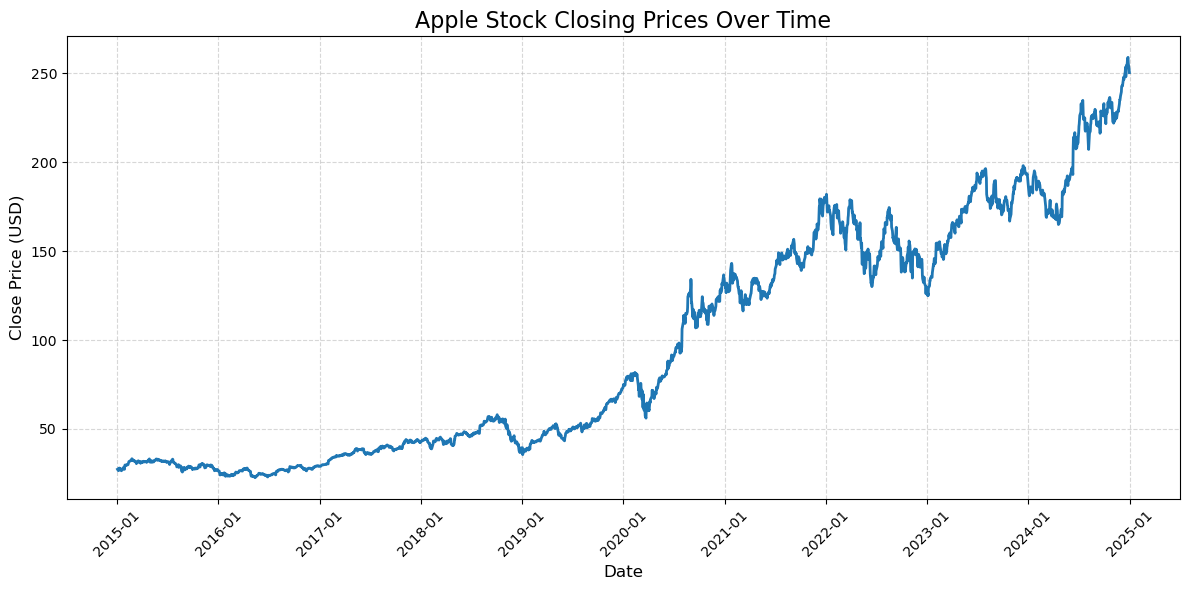

In [8]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], linewidth=2)

# Title & labels
plt.title("Apple Stock Closing Prices Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)

# Grid + Date formatting
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Tight layout for clean output
plt.tight_layout()
plt.show()

In [9]:
train_size = int(len(close_prices) * 0.8)
train_data = close_prices[:train_size]
test_data = close_prices[train_size:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [12]:
train_scaled

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.68543205],
       [0.67395329],
       [0.64892586]])

In [13]:
test_scaled

array([[0.67131883],
       [0.67332599],
       [0.64284148],
       [0.65093307],
       [0.64252784],
       [0.67138152],
       [0.67470596],
       [0.67834405],
       [0.69565632],
       [0.69515451],
       [0.70362238],
       [0.71102403],
       [0.7064451 ],
       [0.70682144],
       [0.72312999],
       [0.74345307],
       [0.75236006],
       [0.74815747],
       [0.76132985],
       [0.77368667],
       [0.75530817],
       [0.7633997 ],
       [0.7705504 ],
       [0.80435949],
       [0.8274424 ],
       [0.81006743],
       [0.82838324],
       [0.81125923],
       [0.80467304],
       [0.80555119],
       [0.82336529],
       [0.81928808],
       [0.83264862],
       [0.82248713],
       [0.81521096],
       [0.78968167],
       [0.79237891],
       [0.7954524 ],
       [0.77857934],
       [0.78616906],
       [0.7829701 ],
       [0.76979772],
       [0.77356129],
       [0.80567667],
       [0.82323981],
       [0.80925207],
       [0.81721813],
       [0.802

In [14]:
print("Original shape:", close_prices.shape)
print("Train shape:", train_data.shape)
print("Scaled train shape:", train_scaled.shape)

Original shape: (2516, 1)
Train shape: (2012, 1)
Scaled train shape: (2012, 1)


In [15]:
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [16]:
time_step = 60
X_train, y_train = create_sequences(train_scaled, time_step)
X_test, y_test = create_sequences(test_scaled, time_step)

In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1952, 60, 1)
y_train shape: (1952, 1)
X_test shape: (444, 60, 1)
y_test shape: (444, 1)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Input

In [25]:
def build_model_a(time_step):
    model = Sequential([
        Input(shape=(time_step, 1)),             # << Ահա մաքուր տարբերակը
        GRU(64, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [20]:
def build_model_b(time_step):
    model = Sequential()
    model.add(Input(shape=(time_step, 1)))
    model.add(GRU(32, return_sequences=True))
    model.add(GRU(32, return_sequences=True))
    model.add(GRU(32))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [26]:
# Train Model A
model_a = build_model_a(time_step)
history_a = model_a.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0347 - val_loss: 0.0011
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0031 - val_loss: 9.8243e-04
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0022 - val_loss: 9.6126e-04
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0018 - val_loss: 9.9226e-04
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0017 - val_loss: 8.9863e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0014 - val_loss: 9.5853e-04
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 3

In [28]:
history_a.history['loss']  

[0.014032944105565548,
 0.00278916722163558,
 0.002057709265500307,
 0.0018876552348956466,
 0.0018008745973929763,
 0.0018882581498473883,
 0.0016904117073863745,
 0.001752282027155161,
 0.0018111722311004996,
 0.0016485580708831549,
 0.001536533236503601,
 0.0015132846310734749,
 0.0016171366441994905,
 0.001416454673744738,
 0.0016919896006584167,
 0.0015315632335841656,
 0.0013220496475696564,
 0.0013512740842998028,
 0.0013559520011767745,
 0.0012408513575792313]

In [29]:
history_a.history['val_loss']

[0.0011072696652263403,
 0.0009824264561757445,
 0.0009612649446353316,
 0.0009922627359628677,
 0.0010817754082381725,
 0.0014524655416607857,
 0.0008986264001578093,
 0.0017666192725300789,
 0.001495041069574654,
 0.0010140928206965327,
 0.0009585335501469672,
 0.0028926508966833353,
 0.0009662401280365884,
 0.00133447942789644,
 0.001272012246772647,
 0.002624778775498271,
 0.0009170263656415045,
 0.001169725670479238,
 0.0008726675878278911,
 0.0008690070826560259]

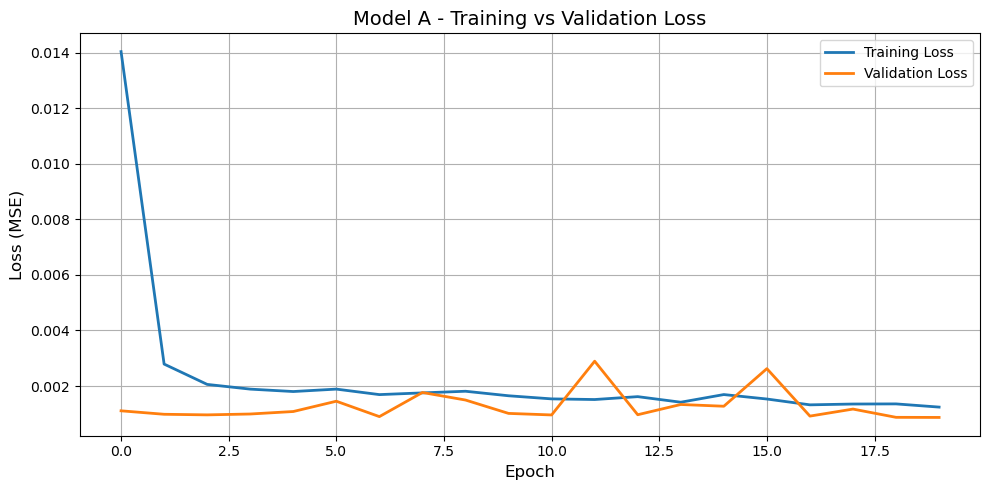

In [30]:
import matplotlib.pyplot as plt

# Plot Model A training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_a.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_a.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model A - Training vs Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
model_b = build_model_b(time_step)
history_b = model_b.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0883 - val_loss: 0.0015
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019 - val_loss: 9.8258e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0014 - val_loss: 8.6695e-04
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0015 - val_loss: 8.3710e-04
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0014 - val_loss: 8.2112e-04
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/

In [32]:
history_b.history['loss']  

[0.035418801009655,
 0.002189685357734561,
 0.0018672456499189138,
 0.0019293548539280891,
 0.0019242020789533854,
 0.0016729534836485982,
 0.0014226232888177037,
 0.0015536319697275758,
 0.001262175152078271,
 0.0014163360465317965,
 0.0012858506524935365,
 0.0015587591333314776,
 0.001211355091072619,
 0.001279310556128621,
 0.0011791206197813153,
 0.0011641322635114193,
 0.0013154117623344064,
 0.0012692749733105302,
 0.001331864856183529,
 0.0010855363216251135]

In [33]:
history_b.history['val_loss']

[0.001549905864521861,
 0.0012454100651666522,
 0.0019576551858335733,
 0.0015424079028889537,
 0.0016122296219691634,
 0.0009825805900618434,
 0.0008669522940181196,
 0.000837095663882792,
 0.0012132030678912997,
 0.0008211230742745101,
 0.0021406698506325483,
 0.0007022005156613886,
 0.0006851668003946543,
 0.0006665828404948115,
 0.002011725911870599,
 0.0006387934554368258,
 0.0012800367549061775,
 0.0017263644840568304,
 0.0014497980009764433,
 0.00079627480590716]

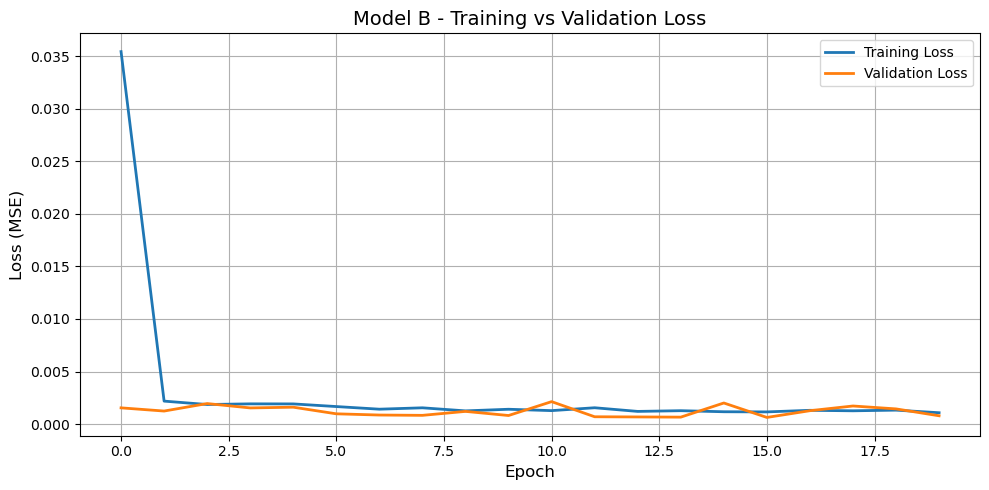

In [34]:
import matplotlib.pyplot as plt

# Plot Model B training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_b.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history_b.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model B - Training vs Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

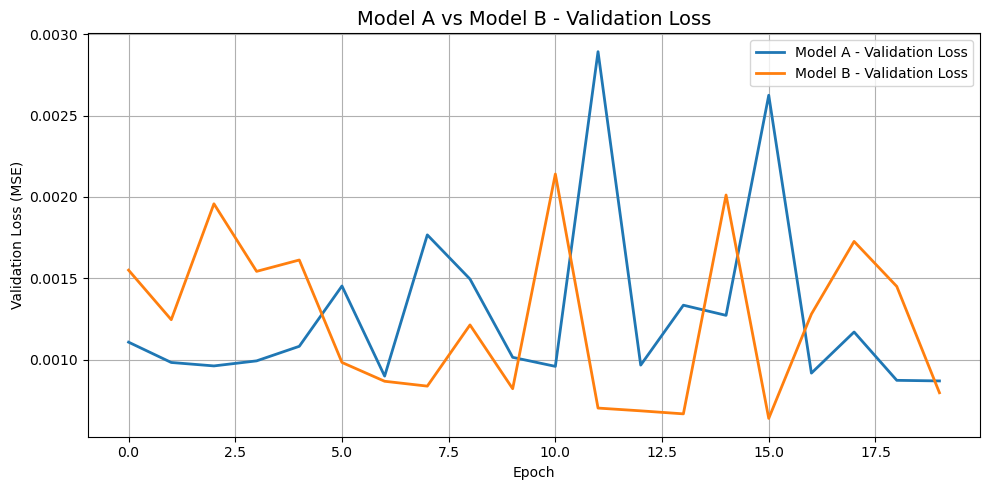

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(history_a.history['val_loss'], label='Model A - Validation Loss', linewidth=2)
plt.plot(history_b.history['val_loss'], label='Model B - Validation Loss', linewidth=2)
plt.title('Model A vs Model B - Validation Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Validation Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Predict for both models
predicted_a_scaled = model_a.predict(X_test)
predicted_b_scaled = model_b.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [37]:
# Reverse scaling to get original price values
predicted_a = scaler.inverse_transform(predicted_a_scaled)
predicted_b = scaler.inverse_transform(predicted_b_scaled)
actual = scaler.inverse_transform(y_test)

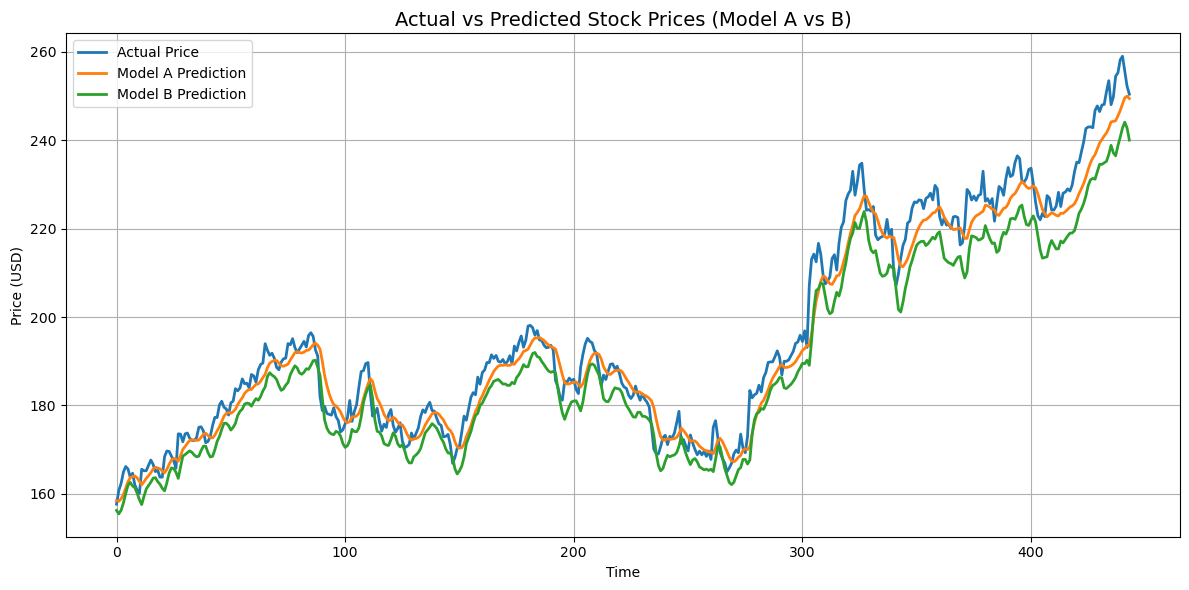

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price', linewidth=2)
plt.plot(predicted_a, label='Model A Prediction', linewidth=2)
plt.plot(predicted_b, label='Model B Prediction', linewidth=2)
plt.title('Actual vs Predicted Stock Prices (Model A vs B)', fontsize=14)
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_a = np.sqrt(mean_squared_error(actual, predicted_a))
rmse_b = np.sqrt(mean_squared_error(actual, predicted_b))

mae_a = mean_absolute_error(actual,predicted_a)
mae_b = mean_absolute_error(actual,predicted_b)

print("Model A RMSE:", rmse_a)
print("Model B RMSE:", rmse_b)

print("Model A MAE:", mae_a)
print("Model B MAE:", mae_b)

Model A RMSE: 4.615069612034189
Model B RMSE: 7.544502069037134
Model A MAE: 3.606863039033907
Model B MAE: 6.533789523013003
